In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('abalone.data', 
                 header=None, 
                 names=['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings'])
df['Sex'] = df['Sex'].astype('str')

#### 7.11a

Parameters:  Index(['Intercept', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked',
       'Viscera', 'Shell'],
      dtype='object')
Parameters:  [  2.98515418  -1.57189738  13.36091617  11.82607248   9.24741445
 -20.21391319  -9.82967548   8.57624241]


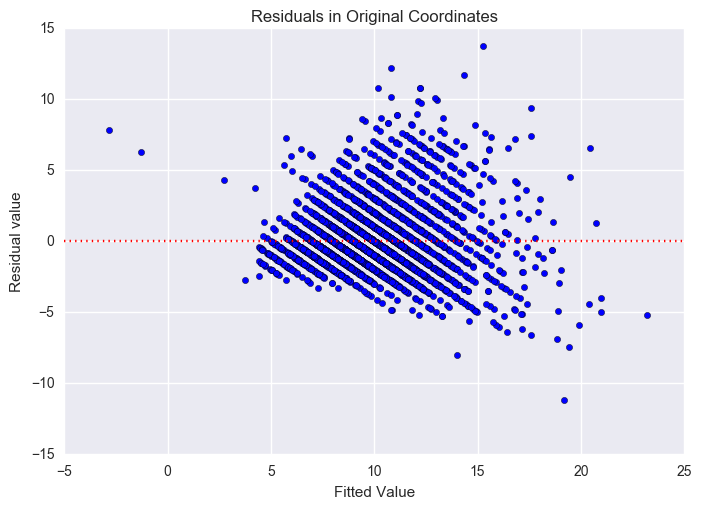

In [3]:
# This line constructs the linear regression. Mass is a function of Fore + Bicep + ...
# Result just calculates the coefficents and the Intercept along with 
# R value among other things.
result = smf.ols(formula='Rings ~ Length + Diameter + Height + Whole + Shucked + Viscera + Shell', data=df).fit()

print('Parameters: ', result.params.keys())
print('Parameters: ', result.params.values)

# vals_zero is just a dictionary that contains the coefficents. I'm constructing the prediction(s).
vals_zero = result.params
pred = vals_zero['Intercept'] + (df['Length'] * vals_zero['Length']) +  (df['Diameter'] * vals_zero['Diameter']) +  (df['Height'] * vals_zero['Height']) \
+ (df['Whole'] * vals_zero['Whole']) + (df['Shucked'] * vals_zero['Shucked']) + (df['Viscera'] * vals_zero['Viscera']) + (df['Shell'] * vals_zero['Shell']) \

plt.figure()

# Draws a horizontal line across the graph at y=0
plt.axhline(y=0, color='r', linestyle='dotted')

plt.scatter(pred, df['Rings'] - pred) # Residual = Observed (y) - Expected (regression)
plt.title('Residuals in Original Coordinates')
plt.xlabel('Fitted Value')
plt.ylabel('Residual value')
plt.show()

#### 7.11b

In [10]:
mod_df = df.copy(deep=True)
l = list(mod_df['Sex'])
for i in range(len(l)):
    if(l[i] == 'M'):
        l[i] = 1
    elif(l[i] == 'F'):
        l[i] = 0
    else:
        l[i] = -1
#df_sex = pd.get_dummies(df['Sex'])
mod_df['Sex'] = df_sex['M'].astype(np.int)
mod_df['Sex'] = pd.Series(l)
#mod_df

Parameters:  Index(['Intercept', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked',
       'Viscera', 'Shell', 'Sex'],
      dtype='object')
Parameters:  [  3.37078117  -0.82639908  11.96403178  11.20449196   9.07020864
 -20.10614364 -10.15510106   8.70110596   0.3884832 ]


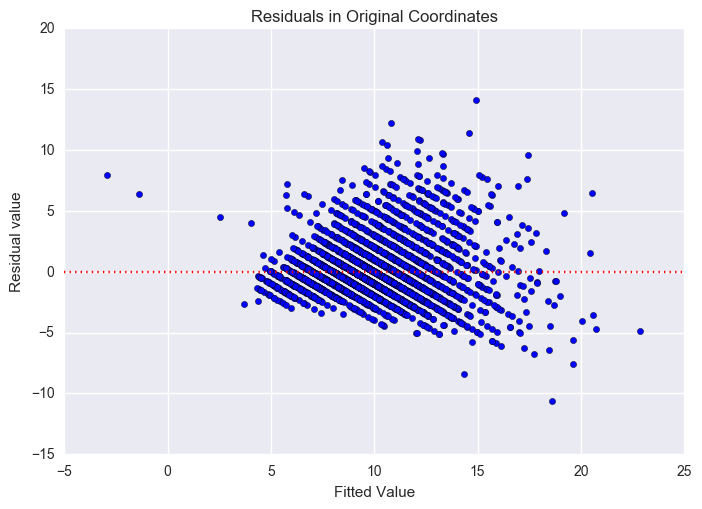

In [11]:
result2 = smf.ols(formula='Rings ~ Length + Diameter + Height + Whole + Shucked + Viscera + Shell + Sex', data=mod_df).fit()


print('Parameters: ', result2.params.keys())
print('Parameters: ', result2.params.values)

vals_zero = result2.params
pred = vals_zero['Intercept'] + (mod_df['Length'] * vals_zero['Length']) +  (mod_df['Diameter'] * vals_zero['Diameter']) +  (mod_df['Height'] * vals_zero['Height']) \
+ (mod_df['Whole'] * vals_zero['Whole']) + (mod_df['Shucked'] * vals_zero['Shucked']) + (mod_df['Viscera'] * vals_zero['Viscera']) + (mod_df['Shell'] * vals_zero['Shell']) \
+ (mod_df['Sex'] * vals_zero['Sex'])


plt.figure()
#plt.xscale('linear')
#plt.yscale('linear')
plt.axhline(y=0, color='r', linestyle='dotted')

plt.scatter(pred, mod_df['Rings'] - pred) # Residual = Observed (y) - Expected (regression)
plt.title('Residuals in Original Coordinates')
plt.xlabel('Fitted Value')
plt.ylabel('Residual value')
plt.show()

#### 7.11c

In [16]:
mod_df2 = df.copy(deep=True)
del mod_df2['Sex']
print(mod_df2)
mod_df2['Rings'] = mod_df2['Rings'].apply(np.log)
print(mod_df2)

      Length  Diameter  Height   Whole  Shucked  Viscera   Shell  Rings
0      0.455     0.365   0.095  0.5140   0.2245   0.1010  0.1500     15
1      0.350     0.265   0.090  0.2255   0.0995   0.0485  0.0700      7
2      0.530     0.420   0.135  0.6770   0.2565   0.1415  0.2100      9
3      0.440     0.365   0.125  0.5160   0.2155   0.1140  0.1550     10
4      0.330     0.255   0.080  0.2050   0.0895   0.0395  0.0550      7
5      0.425     0.300   0.095  0.3515   0.1410   0.0775  0.1200      8
6      0.530     0.415   0.150  0.7775   0.2370   0.1415  0.3300     20
7      0.545     0.425   0.125  0.7680   0.2940   0.1495  0.2600     16
8      0.475     0.370   0.125  0.5095   0.2165   0.1125  0.1650      9
9      0.550     0.440   0.150  0.8945   0.3145   0.1510  0.3200     19
10     0.525     0.380   0.140  0.6065   0.1940   0.1475  0.2100     14
11     0.430     0.350   0.110  0.4060   0.1675   0.0810  0.1350     10
12     0.490     0.380   0.135  0.5415   0.2175   0.0950  0.1900

Parameters:  Index(['Intercept', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked',
       'Viscera', 'Shell'],
      dtype='object')
Parameters:  [ 1.23950276  0.40669412  1.68203806  1.32679808  0.63907938 -1.70429259
 -0.75136304  0.58793206]


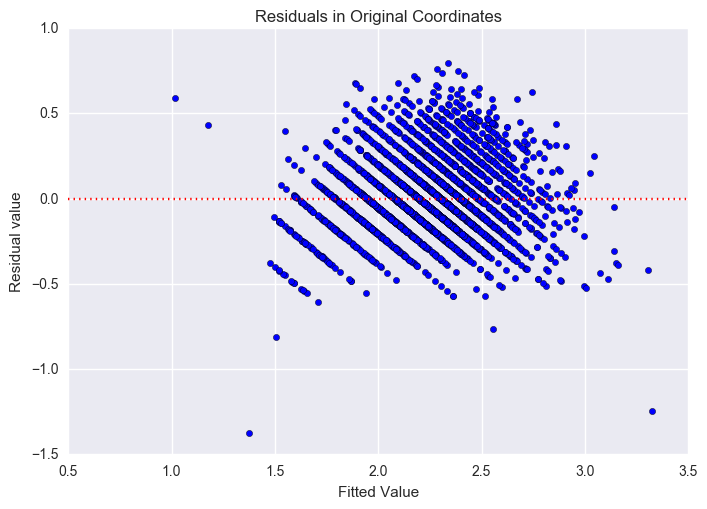

In [17]:
result_one = smf.ols(formula='Rings ~ Length + Diameter + Height + Whole + Shucked + Viscera + Shell', data=mod_df2).fit()


print('Parameters: ', result_one.params.keys())
print('Parameters: ', result_one.params.values)

vals_one = result_one.params
pred = vals_one['Intercept'] + (mod_df2['Length'] * vals_one['Length']) +  (mod_df2['Diameter'] * vals_one['Diameter']) +  (mod_df2['Height'] * vals_one['Height']) \
+ (mod_df2['Whole'] * vals_one['Whole']) + (mod_df2['Shucked'] * vals_one['Shucked']) + (mod_df2['Viscera'] * vals_one['Viscera']) + (mod_df2['Shell'] * vals_one['Shell']) \


plt.figure()
#plt.xscale('linear')
#plt.yscale('linear')
plt.axhline(y=0, color='r', linestyle='dotted')

plt.scatter(pred, mod_df2['Rings'] - pred) # Residual = Observed (y) - Expected (regression)
plt.title('Residuals in Original Coordinates')
plt.xlabel('Fitted Value')
plt.ylabel('Residual value')
plt.show()

#### 7.11d

In [14]:
mod_df3 = df.copy(deep=True)
l = list(mod_df3['Sex'])
for i in range(len(l)):
    if(l[i] == 'M'):
        l[i] = 1
    elif(l[i] == 'F'):
        l[i] = 0
    else:
        l[i] = -1
#df_sex = pd.get_dummies(df['Sex'])
mod_df3['Sex'] = df_sex['M'].astype(np.int)
mod_df3['Sex'] = pd.Series(l)
mod_df3['Rings'] = mod_df3['Rings'].apply(np.log)
print(mod_df3)

      Sex  Length  Diameter  Height   Whole  Shucked  Viscera   Shell  \
0       1   0.455     0.365   0.095  0.5140   0.2245   0.1010  0.1500   
1       1   0.350     0.265   0.090  0.2255   0.0995   0.0485  0.0700   
2       0   0.530     0.420   0.135  0.6770   0.2565   0.1415  0.2100   
3       1   0.440     0.365   0.125  0.5160   0.2155   0.1140  0.1550   
4      -1   0.330     0.255   0.080  0.2050   0.0895   0.0395  0.0550   
5      -1   0.425     0.300   0.095  0.3515   0.1410   0.0775  0.1200   
6       0   0.530     0.415   0.150  0.7775   0.2370   0.1415  0.3300   
7       0   0.545     0.425   0.125  0.7680   0.2940   0.1495  0.2600   
8       1   0.475     0.370   0.125  0.5095   0.2165   0.1125  0.1650   
9       0   0.550     0.440   0.150  0.8945   0.3145   0.1510  0.3200   
10      0   0.525     0.380   0.140  0.6065   0.1940   0.1475  0.2100   
11      1   0.430     0.350   0.110  0.4060   0.1675   0.0810  0.1350   
12      1   0.490     0.380   0.135  0.5415   0.217

Parameters:  Index(['Intercept', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked',
       'Viscera', 'Shell', 'Sex'],
      dtype='object')
Parameters:  [ 1.28412546  0.49295922  1.52039802  1.25487208  0.61857407 -1.69182207
 -0.78901955  0.60238061  0.04495321]


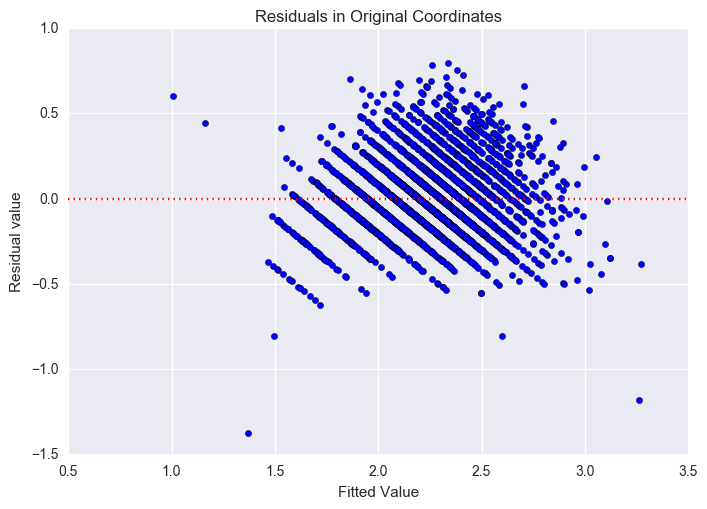

In [15]:
result_one = smf.ols(formula='Rings ~ Length + Diameter + Height + Whole + Shucked + Viscera + Shell + Sex', data=mod_df3).fit()


print('Parameters: ', result_one.params.keys())
print('Parameters: ', result_one.params.values)

vals_one = result_one.params
pred = vals_one['Intercept'] + (mod_df3['Length'] * vals_one['Length']) +  (mod_df3['Diameter'] * vals_one['Diameter']) +  (mod_df3['Height'] * vals_one['Height']) \
+ (mod_df3['Whole'] * vals_one['Whole']) + (mod_df3['Shucked'] * vals_one['Shucked']) + (mod_df3['Viscera'] * vals_one['Viscera']) + (mod_df3['Shell'] * vals_one['Shell']) \
+ (mod_df3['Sex'] * vals_one['Sex'])

plt.figure()
#plt.xscale('linear')
#plt.yscale('linear')
plt.axhline(y=0, color='r', linestyle='dotted')

plt.scatter(pred, mod_df3['Rings'] - pred) # Residual = Observed (y) - Expected (regression)
plt.title('Residuals in Original Coordinates')
plt.xlabel('Fitted Value')
plt.ylabel('Residual value')
plt.show()

#### 7.11e

#### 7.11f

In [ ]:
# glmnet
X = mod_df.drop("Rings", 1).as_matrix().astype(np.float64)
y = mod_df['Rings'].as_matrix().astype(np.float64)

print(type(X))

cvfit = cvglmnet(x = X, y = y)